# 匹配滤波器

## 匹配滤波器的实现
频域频匹配滤波器的生成方式一般有三种：
- 1、将时间反褶后的复制脉冲取复共轭，计算补零离散傅里叶变换；
- 2、复制脉冲补零后进行离散傅里叶变换，对结果取复共轭；
- 3、根据设定的线性调频特性，直接在频域生成匹配滤波器；

前两种方式中的发射复制脉冲在进行快速傅里叶变换之前要补零至选定的长度，由于弃置区等于发射复制脉冲长度(减1)，为进行有效的处理，FFT长度应该数倍于信号长度。


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

from numpy import pi,abs,max,min,argmax,argmin,ceil,exp,sqrt,real,imag,conj,sinc,sin,cos,tan,arctan,log10,angle,unwrap
from numpy import linspace,arange,zeros,ones,concatenate,convolve
from numpy.fft import fft,fftshift,ifft,ifftshift,fft2
from matplotlib.pyplot import figure,subplot,plot,axis,title,suptitle,xlabel,ylabel,text,arrow,tight_layout

### 方式一

Text(0.5, 0.98, '图3.11 方式一生成的频域匹配滤波器频率响应函数的幅度和相位')

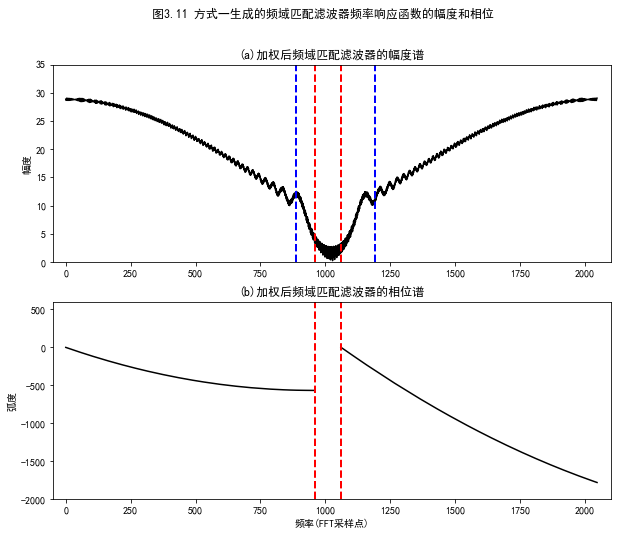

In [5]:
# 参数设置
TBP = 724;             # 时间带宽积
T = 42e-6;             # 脉冲持续时间
Nfft = 2**11;           # FFT长度
# 参数计算
B = TBP/T;             # 信号带宽
K = B/T;               # 线性调频频率
alpha_os = 1.07;       # 过采样率
F = alpha_os*B;        # 采样频率
N = int(2*ceil(F*T/2));     # 采样点数
dt = T/N;              # 采样时间间隔
df = F/N;              # 采样频率间隔
# 变量设置
t = arange(-T/2,T/2,dt);    # 时间变量
f = t*F/T;    # 频率变量
# 信号表达
st = exp(1j*pi*K*t**2);           # Chirp信号复数表达式
Srf = fft((st));                  # Chirp信号频谱表达式
# 窗函数
window = np.kaiser(N,2.5);          # 时域窗
Window = fftshift(window);        # 频域窗
# 信号变换
ht = conj(np.flipud(st));            # 将时间反褶后的复制脉冲取复共轭
ht_window = window*ht;           # 加窗
Hf_1 = fft(ht_window,Nfft);       # 计算补零离散傅里叶变换
# 绘图
H = figure(figsize=(10,8));
# set(H,'position',[500,500,600,400]);
subplot(211),plot(abs(Hf_1),'k')
axis([-50,2100,0,35])
title('(a)加权后频域匹配滤波器的幅度谱'),ylabel('幅度')
plt.axvline(x=886, c="b", ls="--", lw=2)
plt.axvline(x=1190, c="b", ls="--", lw=2)
plt.axvline(x=960, c="r", ls="--", lw=2)
plt.axvline(x=1060, c="r", ls="--", lw=2)

subplot(212);plot(arange(0,960,1),unwrap(angle(Hf_1[:960])),'k')
plot(arange(1060,2048,1),unwrap(angle(Hf_1[1060:2048])),'k')
title('(b)加权后频域匹配滤波器的相位谱'),xlabel('频率(FFT采样点)'),ylabel('弧度')
plt.axvline(x=960, c="r", ls="--", lw=2)
plt.axvline(x=1060, c="r", ls="--", lw=2)
axis([-50,2100,-2000,600])
suptitle('图3.11 方式一生成的频域匹配滤波器频率响应函数的幅度和相位')
# sgtitle('图3.11 方式一生成的频域匹配滤波器频率响应函数的幅度和相位','color','k','Fontsize',10)

### 方式二

Text(0.5, 0.98, '图3.11 方式二生成的频域匹配滤波器频率响应函数的幅度和相位')

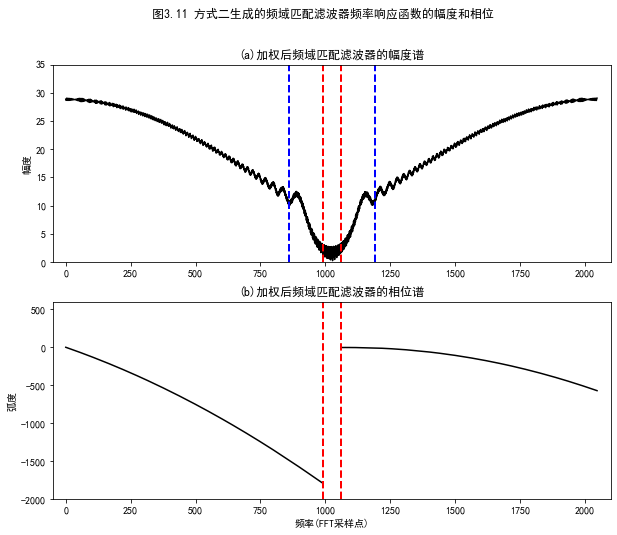

In [11]:
# 参数设置
TBP = 724;             # 时间带宽积
T = 42e-6;             # 脉冲持续时间
Nfft = 2**11;           # FFT长度
# 参数计算
B = TBP/T;             # 信号带宽
K = B/T;               # 线性调频频率
alpha_os = 1.07;       # 过采样率
F = alpha_os*B;        # 采样频率
N = int(2*ceil(F*T/2));     # 采样点数
dt = T/N;              # 采样时间间隔
df = F/N;              # 采样频率间隔
# 变量设置
t = arange(-T/2,T/2,dt);    # 时间变量
f = t*F/T;    # 频率变量
# 信号表达
st = exp(1j*pi*K*t**2);           # Chirp信号复数表达式
Srf = fft((st));                  # Chirp信号频谱表达式
# 窗函数
window = np.kaiser(N,2.5);          # 时域窗
Window = fftshift(window);        # 频域窗
# 信号变换
ht = st;                          # 复制信号
ht_window = window*ht;           # 加窗
Hf_2 = conj(fft(ht_window,Nfft)); # 计算补零离散傅里叶变换
# 绘图
H = figure(figsize=(10,8));
subplot(211);plot(abs(Hf_2),'k')
axis([-50,2100,0,35])
title('(a)加权后频域匹配滤波器的幅度谱');ylabel('幅度')
plt.axvline(x=860, c="b", ls="--", lw=2)
plt.axvline(x=1190, c="b", ls="--", lw=2)
plt.axvline(x=990, c="r", ls="--", lw=2)
plt.axvline(x=1060, c="r", ls="--", lw=2)
subplot(212);
plot(arange(0,990,1),unwrap(-angle(Hf_2[:990])),'k')
plot(arange(1060,2048,1),unwrap(-angle(Hf_2[1060:2048])),'k')
axis([-50,2100,-2000,600])
title('(b)加权后频域匹配滤波器的相位谱');xlabel('频率(FFT采样点)');ylabel('弧度')
plt.axvline(x=990, c="r", ls="--", lw=2)
plt.axvline(x=1060, c="r", ls="--", lw=2)
suptitle('图3.11 方式二生成的频域匹配滤波器频率响应函数的幅度和相位')
# sgtitle('图3.11 方式二生成的频域匹配滤波器频率响应函数的幅度和相位','color','k','Fontsize',10)

### 方式三

Text(0.5, 0.98, '图3.12 方式三生成的匹配滤波器')

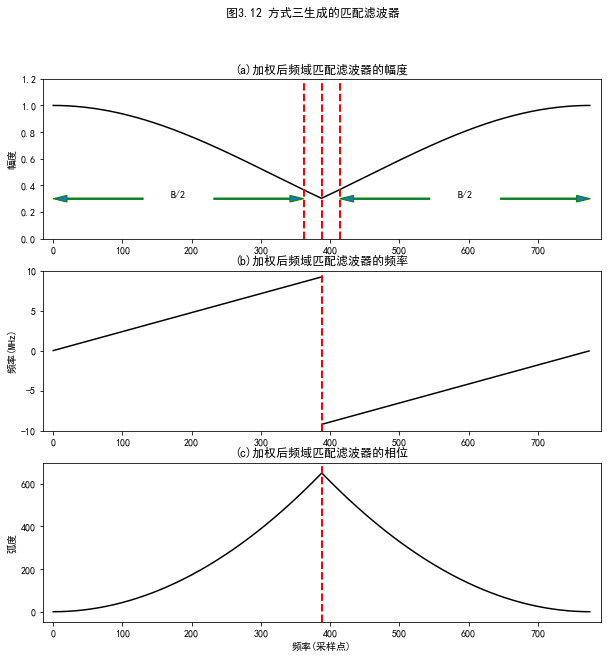

In [17]:
# 参数设置
TBP = 724;             # 时间带宽积
T = 42e-6;             # 脉冲持续时间
Nfft = 2**11;           # FFT长度
# 参数计算
B = TBP/T;             # 信号带宽
K = B/T;               # 线性调频频率
alpha_os = 1.07;       # 过采样率
F = alpha_os*B;        # 采样频率
N = int(2*ceil(F*T/2));     # 采样点数
dt = T/N;              # 采样时间间隔
df = F/N;              # 采样频率间隔
# 变量设置
t = arange(-T/2,T/2,dt);    # 时间变量
f = t*F/T;    # 频率变量
# 信号表达
st = exp(1j*pi*K*t**2);           # Chirp信号复数表达式
Srf = fft((st));                  # Chirp信号频谱表达式
# 窗函数
window = np.kaiser(N,2.5);          # 时域窗
Window = fftshift(window);        # 频域窗
# 信号变换
Hf_3 = Window*exp(1j*pi*f**2/K); # 计算补零离散傅里叶变换
HF_phi = pi*f**2/K;               # 频域匹配滤波器的相位
HF_fre = arange(-F/2,F/2,df);          # 频域匹配滤波器的频率
# 绘图
H = figure(figsize=(10,10));
subplot(311);plot(abs(Hf_3),'k')
axis([-15,791,0,1.2])
title('(a)加权后频域匹配滤波器的幅度'),ylabel('幅度')
plt.axvline(x=362, c="r", ls="--", lw=2)
plt.axvline(x=414, c="r", ls="--", lw=2)
text(181,0.3,'B/2',horizontalalignment='center')
text(595,0.3,'B/2',horizontalalignment='center')
plt.arrow(130, 0.3,-110, 0, width = 0.01, head_width=0.05,head_length=20, ec ='green') 
plt.arrow(232, 0.3, 110, 0, width = 0.01, head_width=0.05,head_length=20, ec ='green') 
plt.arrow(544, 0.3,-110, 0, width = 0.01, head_width=0.05,head_length=20, ec ='green') 
plt.arrow(646, 0.3, 110, 0, width = 0.01, head_width=0.05,head_length=20, ec ='green') 

plt.axvline(x=388, c="r", ls="--", lw=2)
subplot(312);
plot(arange(0,387,1),HF_fre[388:775]*1e-6,'k')
plot(arange(388,775,1),HF_fre[:387]*1e-6,'k')
title('(b)加权后频域匹配滤波器的频率'),ylabel('频率(MHz)')
axis([-15,791,-10,10])
plt.axvline(x=388, c="r", ls="--", lw=2)
subplot(313);plot(fftshift(HF_phi),'k')
title('(c)加权后频域匹配滤波器的相位'),xlabel('频率(采样点)'),ylabel('弧度')
axis([-15,791,-50,700])
plt.axvline(x=388, c="r", ls="--", lw=2)
suptitle('图3.12 方式三生成的匹配滤波器')
# sgtitle('图3.11 方式二生成的匹配滤波器','color','k','Fontsize',10)

## 目标定位和匹配滤波器弃置区

Text(0.5, 0.98, '图3.13 通过压缩目标的位置来说明基带信号的弃置区和TA值')

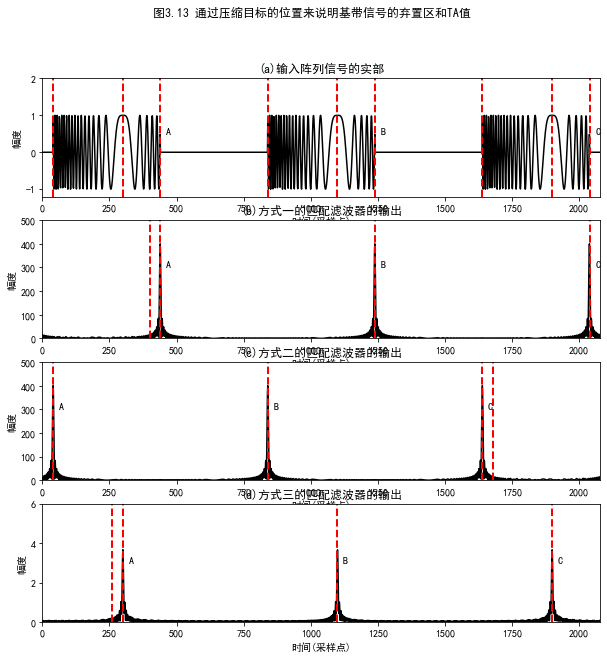

In [21]:
# 参数设置
TBP = 80;              # 时间带宽积
T = 10e-6;             # 脉冲持续时间
# 参数计算
B = TBP/T;             # 信号带宽
K = B/T;               # 线性调频频率
alpha_os = 5;          # 过采样率
F = alpha_os*B;        # 采样频率
N = int(2*ceil(F*T/2));     # 采样点数
dt = T/N;              # 采样时间间隔
# 变量设置
t = arange(-T/2,T/2,dt);    # 时间变量
# 参数设置
N_ZD = 60;             # 零频点位于目标中点右侧N_DZ=(N_L-N_R)/2样本处
t_c = N_ZD*dt;         # 脉冲中心相对于t=0的时间偏移
# 信号表达
st1 = exp(1j*pi*K*(t-t_c)**2);                       # 设定长度的线性调频信号
st2 = zeros(N);                                    # 设定与信号等长的空信号
st  = np.concatenate((zeros(40),st1,st2,st1,st2,st1,zeros(40)), axis=None); # 实际信号
N_st = st.size;                                   # 实际信号的长度
# 变量设置
n = arange(0,N_st,1);                        # 采样点
f = arange(-F/2,F/2,F/N_st);            # 频率轴      
# 窗函数
window_1 = np.kaiser(N,2.5);             # 时域窗
Window_1 = fftshift(window_1);         # 频域窗
# 信号变换-->方式一
ht_1 = conj(np.flipud(st1));              # 将时间反褶后的复制脉冲取复共轭
ht_window_1 = window_1*ht_1;          # 加窗
Hf_1 = fftshift(fft(ht_1,N_st));       # 计算补零离散傅里叶变换
# 窗函数
window_2 = np.kaiser(N,2.5);             # 时域窗
Window_2 = fftshift(window_2);         # 频域窗
# 信号变换-->方式二
ht_2 = st1;                            # 复制信号
ht_window_2 = window_2*ht_2;          # 加窗
Hf_2 = fftshift(conj(fft(ht_2,N_st))); # 计算补零离散傅里叶变换
# 窗函数
window_3 = np.kaiser(N_st,2.5);          # 时域窗
Window_3 = fftshift(window_3);         # 频域窗
# 信号变换-->方式三
Hf_3 = Window_3*exp(1j*pi*f**2/K);    # 计算补零离散傅里叶变换
# 信号表达
Srf = fftshift(fft(st));
Soutf_1 = Srf*Hf_1;
soutt_1 = ifft(ifftshift(Soutf_1));    # 方式一匹配滤波结果
Soutf_2 = Srf*Hf_2;
soutt_2 = ifft(ifftshift(Soutf_2));    # 方式二匹配滤波结果
Soutf_3 = Srf*Hf_3;
soutt_3 = ifft(ifftshift(Soutf_3));    # 方式三匹配滤波结果
# 绘图
H = figure(figsize=(10,10));
subplot(411),;plot(n,real(st),'k')
axis([0,N_st,-1.2,2])
title('(a)输入阵列信号的实部'),xlabel('时间(采样点)'),ylabel('幅度')
text( 470,0.5,'A',horizontalalignment='center')
text(1270,0.5,'B',horizontalalignment='center')
text(2070,0.5,'C',horizontalalignment='center')
plt.axvline(x=40 , c="r", ls="--", lw=2)
plt.axvline(x=440, c="r", ls="--", lw=2)
plt.axvline(x=300, c="r", ls="--", lw=2)
plt.axvline(x=840  , c="r", ls="--", lw=2)
plt.axvline(x=1240 , c="r", ls="--", lw=2)
plt.axvline(x=1100 , c="r", ls="--", lw=2)
plt.axvline(x=1640 , c="r", ls="--", lw=2)
plt.axvline(x=2040 , c="r", ls="--", lw=2)
plt.axvline(x=1900 , c="r", ls="--", lw=2)
subplot(412),plot(n,abs(soutt_1),'k')
axis([0,N_st,0,500])
title('(b)方式一的匹配滤波器的输出');xlabel('时间(采样点)');ylabel('幅度')
text( 470,300,'A',horizontalalignment='center')
text(1270,300,'B',horizontalalignment='center')
text(2070,300,'C',horizontalalignment='center')
plt.axvline(x= 440 , c="r", ls="--", lw=2)
plt.axvline(x=1240 , c="r", ls="--", lw=2)
plt.axvline(x=2040 , c="r", ls="--", lw=2)
plt.axvline(x= 400 , c="r", ls="--", lw=2)
subplot(413);plot(n,abs(soutt_2),'k')
axis([0,N_st,0,500])
title('(c)方式二的匹配滤波器的输出'),xlabel('时间(采样点)'),ylabel('幅度')
text(  70,300,'A',horizontalalignment='center')
text( 870,300,'B',horizontalalignment='center')
text(1670,300,'C',horizontalalignment='center')
plt.axvline(x=  40 , c="r", ls="--", lw=2)
plt.axvline(x= 840 , c="r", ls="--", lw=2)
plt.axvline(x=1640 , c="r", ls="--", lw=2)
plt.axvline(x=1680 , c="r", ls="--", lw=2)
subplot(414);plot(n,abs(soutt_3),'k')
axis([0,N_st,0,6])
title('(d)方式三的匹配滤波器的输出'),xlabel('时间(采样点)'),ylabel('幅度')
text( 330,3,'A',horizontalalignment='center')
text(1130,3,'B',horizontalalignment='center')
text(1930,3,'C',horizontalalignment='center')
plt.axvline(x= 300 , c="r", ls="--", lw=2)
plt.axvline(x=1100 , c="r", ls="--", lw=2)
plt.axvline(x=1900 , c="r", ls="--", lw=2)
plt.axvline(x= 260 , c="r", ls="--", lw=2)
suptitle('图3.13 通过压缩目标的位置来说明基带信号的弃置区和TA值')


## 调频率失配

调频率K的误差会引起滤波器的失配，使得IRW展宽，旁瓣增大。

Text(0.5, 0.98, '回波信号的频谱分析')

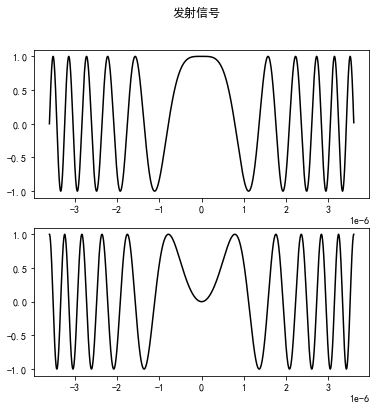

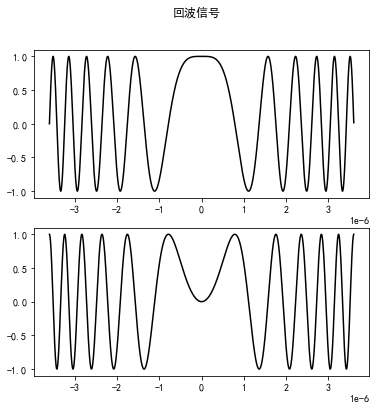

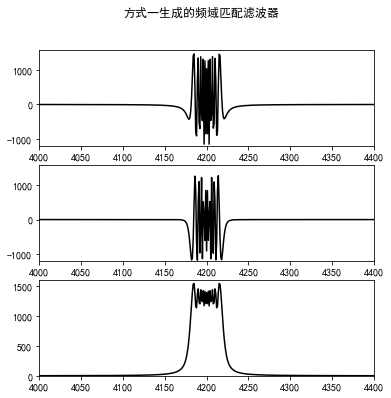

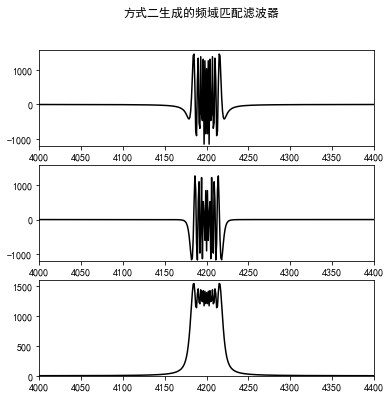

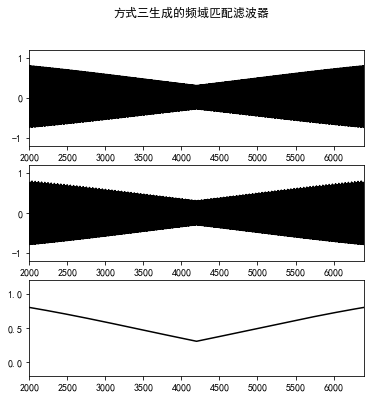

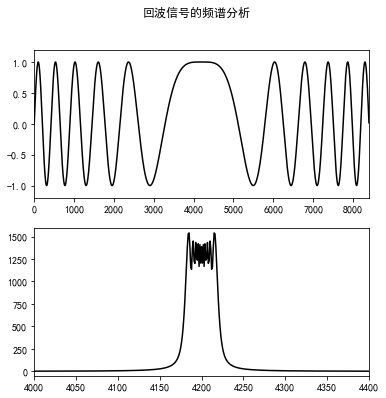

In [50]:
# 参数设置
TBP = 42;                # 时间带宽乘积
T = 7.2e-6;              # 脉冲持续时间
N_st = 2**11;                         
# 参数计算
B = TBP/T;               # 信号带宽
K = B/T;                 # 调频频率
alpha_os = 200;          # 过采样率，使用过高的过采样率是为了方便地实现升采样
F = alpha_os*B;          # 采样频率
N = int(2*ceil(F*T/2));       # 采样点数
dt = T/N;                # 采样时间间隔
df = F/N;                # 采样频率间隔
# 参数设置
t_c = 0e-6;              # 时间偏移
# 参数计算
f_c = -K*t_c;            # 中心频点
# 变量设置
t1 = arange(-T/2,T/2,dt);     # 时间变量
f1 = arange(-F/2,F/2,df);     # 频率变量
# 信号表达                             
st = exp(1j*pi*K*(t1-t_c)**2);          # 发射信号
# 绘图
H1 = figure(figsize=(6,6));
# set(H1,'position',[100,100,600,300]);
subplot(211);plot(t1,real(st),'k')
subplot(212);plot(t1,imag(st),'k')
suptitle('发射信号')# 参数设置
t_0 = 0e-6;              # 回波时延
# 变量设置
t2 = arange(-T/2+t_0,T/2+t_0,dt);            # 时间变量
f2 = arange(-F/2+f_c,F/2+f_c,df);            # 频率变量
# 信号表达                                                                 
srt = exp(1j*pi*K*(t2-t_c-t_0)**2);     # 回波信号
# 绘图
H2 = figure(figsize=(6,6));
# set(H2,'position',[100,100,600,300]);
subplot(211);plot(t2,real(srt),'k')
subplot(212);plot(t2,imag(srt),'k')
suptitle('回波信号')
# 窗函数
window_1 = np.kaiser(N,2.5);              # 时域窗
Window_1 = fftshift(window_1);          # 频域窗
# 信号变换-->方式一
ht_1 = conj(np.flipud(srt));               # 将时间反褶后的复制脉冲取复共轭
ht_window_1 = window_1*ht_1;           # 加窗
Hf_1 = fftshift(fft(ht_1,N));           # 计算补零离散傅里叶变换
# 绘图
H3 = figure(figsize=(6,6));
# set(H3,'position',[100,100,600,450]);
subplot(311);plot(real(Hf_1),'k')
axis([4000,4400,-1200,1600])
subplot(312);plot(imag(Hf_1),'k')
axis([4000,4400,-1200,1600])
subplot(313);plot( abs(Hf_1),'k')
suptitle('方式一生成的频域匹配滤波器')
axis([4000,4400,    0,1600])
# 窗函数 
window_2 = np.kaiser(N,2.5);              # 时域窗
Window_2 = fftshift(window_2);          # 频域窗
# 信号变换-->方式二
ht_2 = srt;                             # 复制信号
ht_window_2 = window_2*ht_2;           # 加窗
Hf_2 = fftshift(conj(fft(ht_2,N)));     # 计算补零离散傅里叶变换
# 绘图
H3 = figure(figsize=(6,6));
# set(H3,'position',[100,100,600,450]);
subplot(311);plot(real(Hf_2),'k')
axis([4000,4400,-1200,1600])
subplot(312);plot(imag(Hf_2),'k')
axis([4000,4400,-1200,1600])
subplot(313);plot( abs(Hf_2),'k')
axis([4000,4400,    0,1600])
suptitle('方式二生成的频域匹配滤波器')
# 窗函数
window_3 = np.kaiser(N,2.5);              # 时域窗
Window_3 = fftshift(window_3);          # 频域窗
# 信号变换-->方式三
Hf_3 = Window_3*exp(1j*pi*f2**2/K);    # 计算补零离散傅里叶变换
# 绘图
H3 = figure(figsize=(6,6));
# set(H3,'position',[100,100,600,450]);
subplot(311);plot(real(Hf_3),'k')
axis([2000,6400,-1.2,1.2])
subplot(312);plot(imag(Hf_3),'k')
axis([2000,6400,-1.2,1.2])
subplot(313);plot( abs(Hf_3),'k')
axis([2000,6400,-0.2,1.2])
suptitle('方式三生成的频域匹配滤波器')

# 信号表达
Srf = fftshift(fft(srt));
# 绘图
H4 = figure(figsize=(6,6));
# set(H4,'position',[100,100,600,300]);
subplot(211);plot(real(srt),'k')
axis([0,N,-1.2,1.2])
subplot(212);plot(abs(Srf),'k')
axis([4000,4400,-50,1600])
suptitle('回波信号的频谱分析')


In [30]:
from numpy import sum,isrealobj,sqrt
from numpy.random import standard_normal
from scipy.signal import find_peaks
def pslr(Af):
    af = Af    
    #% 提取PSLR
    pks= find_peaks( af );
    sort_array = np.sort(af[pks[0]])[::-1]
#     PSLR = 20*np.log10( sort_array[0] )
    # 次峰
    PSLR = sort_array[1]  
    return PSLR
def irw(Af):
    #% 找到Af的最大位置
    locmax = np.argmax( Af );
    #% 找到locmax左边最接近-3dB的位置
    locleft = np.argmin(np.abs(Af[0:locmax]/np.max(np.abs(Af[0:locmax]))-0.707));
    #% 找到locmax右边最接近-3dB的位置
    locright = np.min(np.abs(Af[locmax+1:]/np.max(np.abs(Af[locmax+1:]))-0.707));
    locright = locright + locmax;
    #% 得到3dB波束宽度
    irw = locright-locleft
    return irw,locleft,locright

def  islr(af,Nr):      
#     #% 计算ISLR
    #% 找到Af的最大位置
    locmax = np.argmax( af );
    #% 找到locmax左边最接近-3dB的位置
    locleft = np.argmin(np.abs(af[0:locmax]/np.max(np.abs(af[0:locmax]))-0.707));
    #% 找到locmax右边最接近-3dB的位置
    locright = np.argmin(np.abs(af[locmax+1:]/np.max(np.abs(af[locmax+1:]))-0.707));
    locright = locright + locmax;
    #% 计算总功率
    P_total = np.sum(af[locleft-Nr:locright+Nr+1]**2);
    #% 计算主瓣功率
    P_main = np.sum(af[locleft:locright+1]**2);
    #% 一维积分旁瓣比
    ISLR = 10*np.log10((P_total-P_main)/P_main);
    return ISLR


Text(7000, -10, 'PSLR= -13.140981022231324dB')

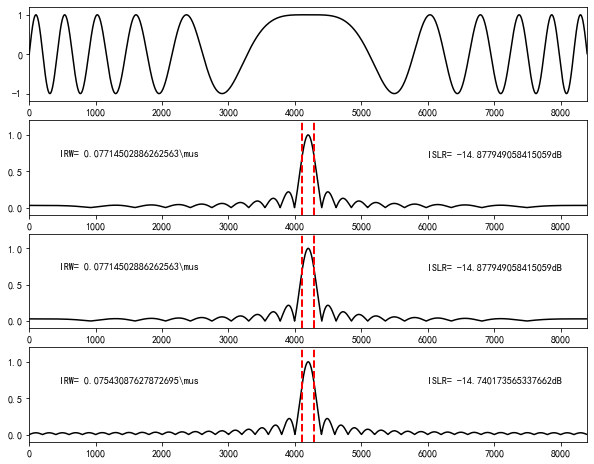

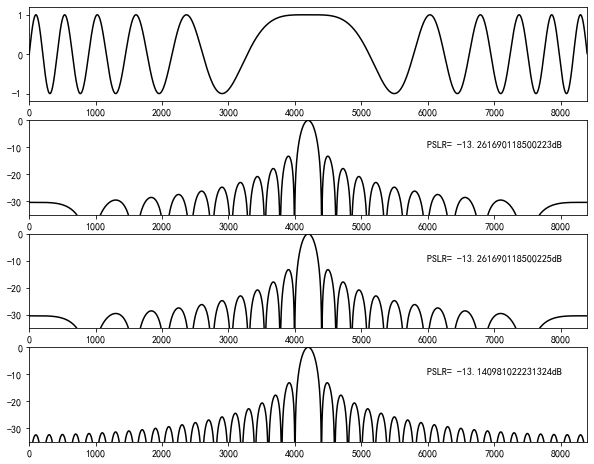

In [52]:
eps = np.finfo(np.float64).eps
# 信号表达
Soutf_1 = Srf*Hf_1;
soutt_1 = ifft(ifftshift(Soutf_1));     # 方式一匹配滤波结果
soutt_1_nor = abs(soutt_1)/max(abs(soutt_1));               # 归一化
soutt_1_log = 20*log10(abs(soutt_1)/max(abs(soutt_1))+eps); # 对数化
Soutf_2 = Srf*Hf_2;
soutt_2 = ifft(ifftshift(Soutf_2));     # 方式二匹配滤波结果
soutt_2_nor = abs(soutt_2)/max(abs(soutt_2));               # 归一化
soutt_2_log = 20*log10(abs(soutt_2)/max(abs(soutt_2))+eps); # 对数化
Soutf_3 = Srf*Hf_3;
soutt_3 = ifft(ifftshift(Soutf_3));     # 方式三匹配滤波结果 
soutt_3_nor = abs(soutt_3)/max(abs(soutt_3));               # 归一化
soutt_3_log = 20*log10(abs(soutt_3)/max(abs(soutt_3))+eps); # 对数化
# 参数计算-->IRW
irw1,a1,b1 = irw(fftshift(soutt_1_nor));irw11 = irw1*dt;
irw2,a2,b2 = irw(fftshift(soutt_2_nor));irw12 = irw2*dt;
irw3,a3,b3 = irw(soutt_3_nor);irw13 = irw3*dt;
# 参数计算-->ISLR
islr1 = islr(fftshift(soutt_1_nor),5);
islr2 = islr(fftshift(soutt_2_nor),5);
islr3 = islr(soutt_3_nor,5);
# 绘图                                        
H5 = figure(figsize=(10,8));
subplot(411);plot(real(srt),'k')
axis([0 ,N,-1.2,1.2])
subplot(412),plot(fftshift(soutt_1_nor),'k')
axis([0 ,N,-0.1,1.2])
plt.axvline(x= 4110 , c="r", ls="--", lw=2)
plt.axvline(x= 4290 , c="r", ls="--", lw=2)
text(1500,0.7,'IRW= '+str(irw11*1e+6)+'\mus',horizontalalignment='center')
text(7000,0.7,'ISLR= '+str(islr1)+'dB',horizontalalignment='center')
subplot(413),plot(fftshift(soutt_2_nor),'k')
axis([0 ,N,-0.1,1.2])
plt.axvline(x= 4290 , c="r", ls="--", lw=2)
plt.axvline(x= 4290 , c="r", ls="--", lw=2)
plt.axvline(x= 4111 , c="r", ls="--", lw=2)
plt.axvline(x= 4291 , c="r", ls="--", lw=2)
text(1500,0.7,'IRW= '+str(irw12*1e+6)+'\mus',horizontalalignment='center')
text(7000,0.7,'ISLR= '+str(islr2)+'dB',horizontalalignment='center')
subplot(414),plot(soutt_3_nor,'k')
axis([0 ,N,-0.1,1.2])
plt.axvline(x= 4113 , c="r", ls="--", lw=2)
plt.axvline(x= 4289 , c="r", ls="--", lw=2)
text(1500,0.7,'IRW= '+str(irw13*1e+6)+'\mus',horizontalalignment='center')
text(7000,0.7,'ISLR= '+str(islr3)+'dB',horizontalalignment='center')
# 参数计算-->PSLR
pslr1 = pslr(fftshift(soutt_1_log));
pslr2 = pslr(fftshift(soutt_2_log));
pslr3 = pslr(soutt_3_log);
# 绘图                                        
H6 = figure(figsize=(10,8));
subplot(411),plot(real(srt),'k')
axis([0 ,N,-1.2,1.2])
subplot(412),plot(fftshift(soutt_1_log),'k')
axis([0 ,N,-35, 0])
text(7000,-10,'PSLR= '+str(pslr1)+'dB',horizontalalignment='center')
subplot(413),plot(fftshift(soutt_2_log),'k')
axis([0 ,N,-35, 0])
text(7000,-10,'PSLR= '+str(pslr2)+'dB',horizontalalignment='center')
subplot(414),plot(soutt_3_log,'k')
axis([0 ,N,-35, 0])
text(7000,-10,'PSLR= '+str(pslr3)+'dB',horizontalalignment='center')

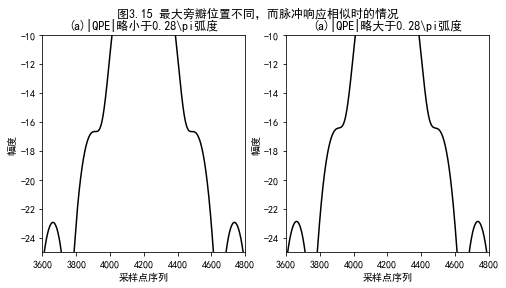

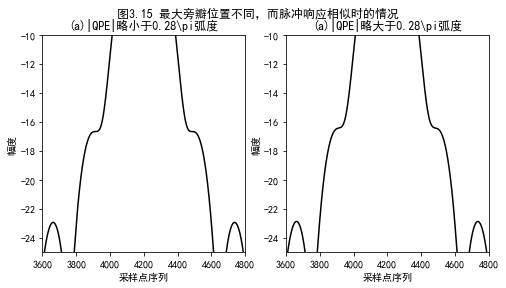

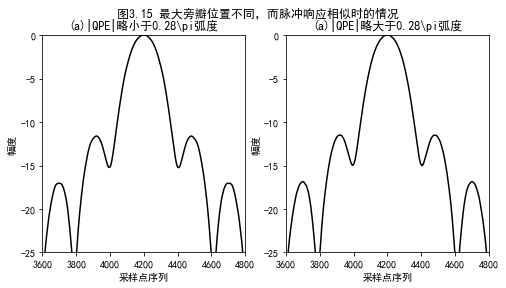

In [54]:
# 参数设置
QPE = linspace(0,0.8*pi,N);            # 二次相位误差
dk = 4*QPE/(pi*T**2);                   # 调频率误差
# 参数设置
IRW1  = zeros(N);                    # 初始化冲激响应宽度
PSLR1 = zeros(N);                    # 初始化峰值旁瓣比
ISLR1 = zeros(N);                    # 初始化积分旁瓣比
IRW2  = zeros(N);                    # 初始化冲激响应宽度
PSLR2 = zeros(N);                    # 初始化峰值旁瓣比
ISLR2 = zeros(N);                    # 初始化积分旁瓣比
IRW3  = zeros(N);                    # 初始化冲激响应宽度
PSLR3 = zeros(N);                    # 初始化峰值旁瓣比
ISLR3 = zeros(N);                    # 初始化积分旁瓣比
# 绘图
F8,A8 = plt.subplots(1,2)
F9,A9 = plt.subplots(1,2)
F10,A10 = plt.subplots(1,2)
F8.set_figheight(4)
F8.set_figwidth(8)
F9.set_figheight(4)
F9.set_figwidth(8)
F10.set_figheight(4)
F10.set_figwidth(8)
# 循环计算
for i in range(N):
    # 变量设置
    B_dk = (K+dk[i])*T;
    F_dk = alpha_os*B_dk;
    df_dk = F_dk/N;
    f3 = arange(-F_dk/2+f_c,F_dk/2+f_c,df_dk);           # 频率变量
    # 信号表达                                                                 
    st_dk = exp(1j*pi*(K+dk[i])*t1**2);                  
    Sf_dk = fftshift(fft(st_dk));
    # 信号变换-->频域方式一
    ht_dk_1 = conj(np.flipud(st_dk));                     # 将时间反褶后的复制脉冲取复共轭
    ht_window_dk_1 = window_1*ht_dk_1;                # 加窗
    Hf_dk_1 = fftshift(fft(ht_window_dk_1,N));         # 计算补零离散傅里叶变换
    # 信号变换-->频域方式二
    ht_dk_2 = st_dk;                                   # 复制信号
    ht_window_dk_2 = window_2*ht_dk_2;                # 加窗
    Hf_dk_2 = fftshift(conj(fft(ht_window_dk_2,N)));   # 计算补零离散傅里叶变换
    # 信号变换-->频域方式三
    Hf_dk_3 = Window_3*exp(1j*pi*f3**2/(K+dk[i]));    # 计算补零离散傅里叶变换
# 参数计算-->方式一                                         
    Soutf_dk_1 = Srf*Hf_dk_1;
    soutt_dk_1 = ifft(ifftshift(Soutf_dk_1));          # 方式一匹配滤波结果 
    soutt_dk_1_nor = abs(soutt_dk_1)/max(abs(soutt_dk_1));               # 归一化
    soutt_dk_1_log = 20*log10(abs(soutt_dk_1)/max(abs(soutt_dk_1))+eps); # 对数化
    # 参数计算-->IRW
    irw_dk_1,lef,rig = irw(fftshift(soutt_dk_1_nor));
    IRW1[i] = irw_dk_1;
    # 参数计算-->PSLR
    pslr_dk_1 = pslr(fftshift(soutt_dk_1_log));
    PSLR1[i] = pslr_dk_1;
    # 参数计算-->ISLR
    islr_dk_1 = islr(fftshift(soutt_dk_1_nor),5);
    ISLR1[i] = islr_dk_1;
    # 绘图
    if i == 2990:
        A8[0].plot(fftshift(soutt_dk_1_log),'k')
        A8[0].set_xlim([3600 ,4800])
        A8[0].set_ylim([-25,-10])
        A8[0].set_title('(a)|QPE|略小于0.28\pi弧度');
        A8[0].set_xlabel('采样点序列');
        A8[0].set_ylabel('幅度')

    if i == 3100:
        A8[1].plot(fftshift(soutt_dk_1_log),'k')
        A8[1].set_xlim([3600 ,4800])
        A8[1].set_ylim([-25,-10])
        A8[1].set_title('(a)|QPE|略大于0.28\pi弧度')
        A8[1].set_xlabel('采样点序列')
        A8[1].set_ylabel('幅度')
        F8.suptitle('图3.15 最大旁瓣位置不同，而脉冲响应相似时的情况')

# 参数计算-->方式二                                        
    Soutf_dk_2 = Srf*Hf_dk_2;
    soutt_dk_2 = ifft(ifftshift(Soutf_dk_2));          # 方式二匹配滤波结果 
    soutt_dk_2_nor = abs(soutt_dk_2)/max(abs(soutt_dk_2));               # 归一化
    soutt_dk_2_log = 20*log10(abs(soutt_dk_2)/max(abs(soutt_dk_2))+eps); # 对数化
    # 参数计算-->IRW
    irw_dk_2,lef,rig = irw(fftshift(soutt_dk_2_nor));
    IRW2[i] = irw_dk_2;
    # 参数计算-->PSLR
    pslr_dk_2 = pslr(fftshift(soutt_dk_2_log));
    PSLR2[i] = pslr_dk_2;
    # 参数计算-->ISLR
    islr_dk_2 = islr(fftshift(soutt_dk_2_nor),5);
    ISLR2[i] = islr_dk_2;
    # 绘图
    if i == 2990:
        A9[0].plot(fftshift(soutt_dk_2_log),'k')
        A9[0].set_xlim([3600 ,4800])
        A9[0].set_ylim([-25,-10])
        A9[0].set_title('(a)|QPE|略小于0.28\pi弧度');
        A9[0].set_xlabel('采样点序列');
        A9[0].set_ylabel('幅度')

    if i == 3100:
        A9[1].plot(fftshift(soutt_dk_1_log),'k')
        A9[1].set_xlim([3600 ,4800])
        A9[1].set_ylim([-25,-10])
        A9[1].set_title('(a)|QPE|略大于0.28\pi弧度')
        A9[1].set_xlabel('采样点序列')
        A9[1].set_ylabel('幅度')
        F9.suptitle('图3.15 最大旁瓣位置不同，而脉冲响应相似时的情况')

# 参数计算-->方式三                                         
    Soutf_dk_3 = Srf*Hf_dk_3;
    soutt_dk_3 = ifft(ifftshift(Soutf_dk_3));          # 方式三匹配滤波结果 
    soutt_dk_3_nor = abs(soutt_dk_3)/max(abs(soutt_dk_3));               # 归一化
    soutt_dk_3_log = 20*log10(abs(soutt_dk_3)/max(abs(soutt_dk_3))+eps); # 对数化
    # 参数计算-->IRW
    irw_dk_3,lef,rig = irw(soutt_dk_3_nor);
    IRW3[i] = irw_dk_3;
    # 参数计算-->PSLR
    pslr_dk_3 = pslr(soutt_dk_3_log);
    PSLR3[i] = pslr_dk_3;
    # 参数计算-->ISLR
    islr_dk_3 = islr(soutt_dk_3_nor,5);
    ISLR3[i] = islr_dk_3;
    # 绘图
    if i == 2990:
        A10[0].plot(soutt_dk_3_log,'k')
        A10[0].set_xlim([3600 ,4800])
        A10[0].set_ylim([-25,0])
        A10[0].set_title('(a)|QPE|略小于0.28\pi弧度');
        A10[0].set_xlabel('采样点序列');
        A10[0].set_ylabel('幅度')

    if i == 3100:
        A10[1].plot(soutt_dk_3_log,'k')
        A10[1].set_xlim([3600 ,4800])
        A10[1].set_ylim([-25,0])
        A10[1].set_title('(a)|QPE|略大于0.28\pi弧度')
        A10[1].set_xlabel('采样点序列')
        A10[1].set_ylabel('幅度')
        F10.suptitle('图3.15 最大旁瓣位置不同，而脉冲响应相似时的情况')

Text(0.5, 0.98, '图3.14 当\x08eta=2.5时的IRW、PSLR、ISLR与QPE之间的关系')

d:\anaconda3\envs\stock\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


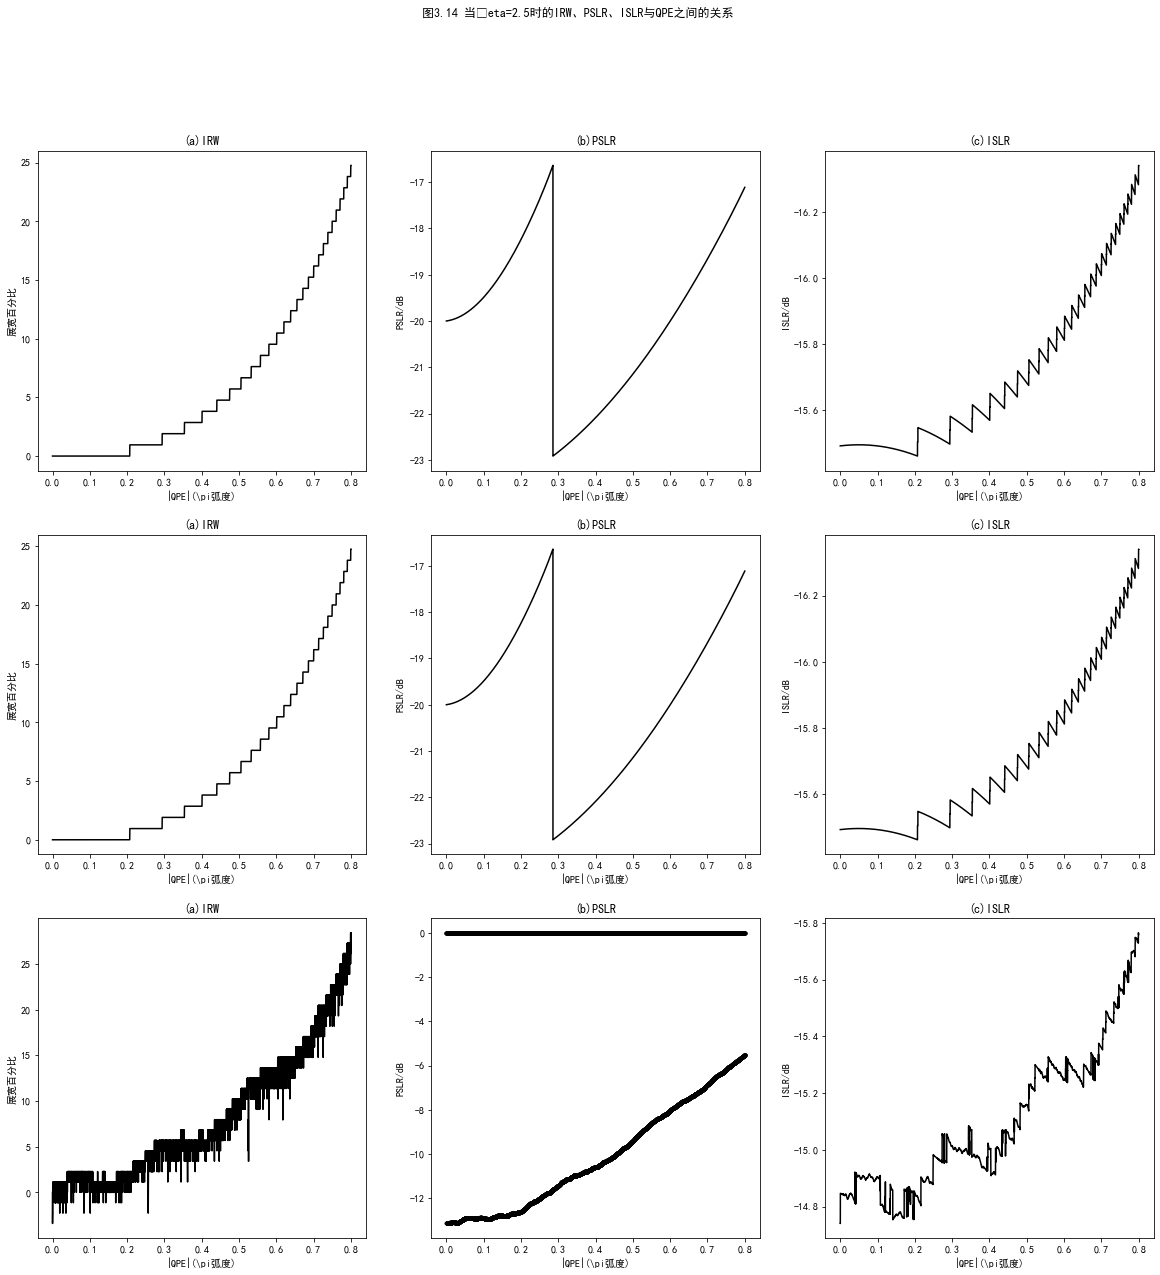

In [53]:
# 绘图
H7 = figure(figsize=(20,20));
subplot(331),plot(QPE/pi,(IRW1-IRW1[0])/IRW1[0]*100,'k')
title('(a)IRW'),xlabel('|QPE|(\pi弧度)'),ylabel('展宽百分比')
subplot(332),plot(QPE/pi,PSLR1,'k')
title('(b)PSLR'),xlabel('|QPE|(\pi弧度)'),ylabel('PSLR/dB')
subplot(333),plot(QPE/pi,ISLR1,'k')
plt.gca().invert_yaxis()
title('(c)ISLR'),xlabel('|QPE|(\pi弧度)'),ylabel('ISLR/dB')
subplot(334),plot(QPE/pi,(IRW2-IRW2[0])/IRW2[0]*100,'k')
title('(a)IRW'),xlabel('|QPE|(\pi弧度)'),ylabel('展宽百分比')
subplot(335),plot(QPE/pi,PSLR2,'k')
title('(b)PSLR'),xlabel('|QPE|(\pi弧度)'),ylabel('PSLR/dB')
subplot(336),plot(QPE/pi,ISLR2,'k')
title('(c)ISLR'),xlabel('|QPE|(\pi弧度)'),ylabel('ISLR/dB')
plt.gca().invert_yaxis()
subplot(337),plot(QPE/pi,(IRW3-IRW3[0])/IRW3[0]*100,'k')
title('(a)IRW'),xlabel('|QPE|(\pi弧度)'),ylabel('展宽百分比')
subplot(338),plot(QPE/pi,PSLR3,'k.')
title('(b)PSLR'),xlabel('|QPE|(\pi弧度)'),ylabel('PSLR/dB')
subplot(339),plot(QPE/pi,ISLR3,'k')
title('(c)ISLR'),xlabel('|QPE|(\pi弧度)'),ylabel('ISLR/dB')
plt.gca().invert_yaxis()
suptitle('图3.14 当\beta=2.5时的IRW、PSLR、ISLR与QPE之间的关系')